In [1]:
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
!pip install C:\Users\ghebr\deeplearningfinal\pretrained_facenet\facenet_pytorch-2.2.9-py3-none-any.whl



Processing c:\users\ghebr\deeplearningfinal\pretrained_facenet\facenet_pytorch-2.2.9-py3-none-any.whl
facenet-pytorch is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [5]:
from facenet_pytorch import MTCNN
from PIL import Image
import cv2
import glob
from tqdm import tqdm


MTCNN is running on: cpu


In [20]:
# Define MTCNN on CPU
mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device='cpu')

# Print confirmation
print(f"MTCNN is running on: {mtcnn.device}")

# Load a small batch of video files or frames (50 files in this case)
filenames = glob.glob('C:/Users/ghebr/deeplearningfinal/dfdc_train_part_05/dfdc_train_part_5/*.mp4')[:50]
print(f"Loaded {len(filenames)} files.")


MTCNN is running on: cpu
Loaded 50 files.


torch.Size([1, 3, 160, 160])

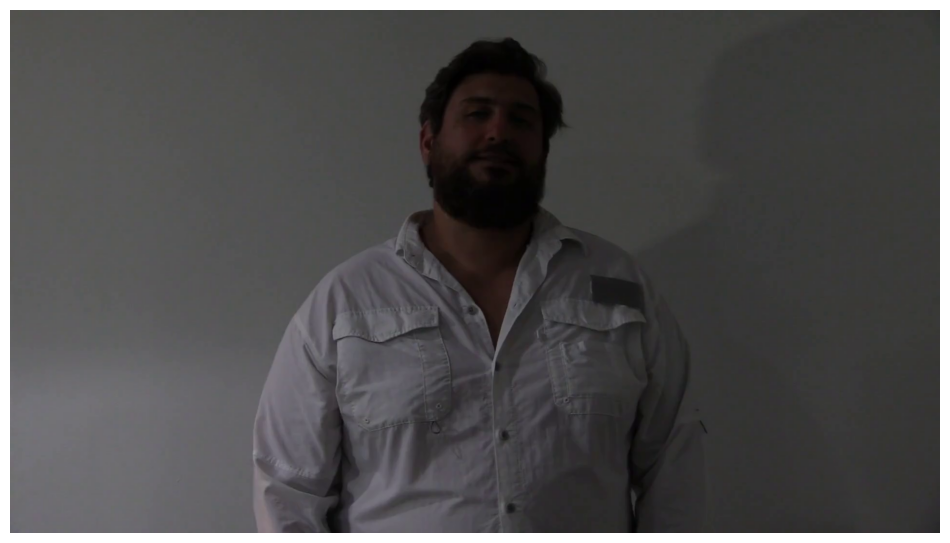

In [23]:
import matplotlib.pyplot as plt


# Load a single image and display
v_cap = cv2.VideoCapture(r'C:\Users\ghebr\deeplearningfinal\dfdc_train_part_05\dfdc_train_part_5\aahslbfkop.mp4')
success, frame = v_cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis('off')

# Detect face
face = mtcnn(frame)
face.shape

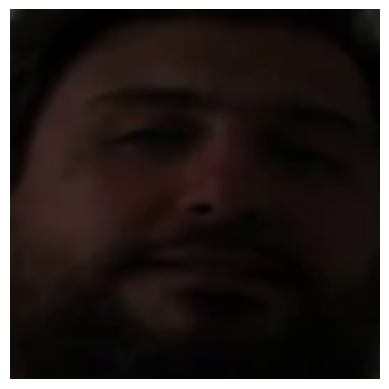

In [24]:
# Create face detector
mtcnn = MTCNN(select_largest=False, post_process=False, device='cpu')

# Detect face
face = mtcnn(frame)

# Visualize
plt.imshow(face.permute(1, 2, 0).int().numpy())
plt.axis('off');

In [36]:
import os
import cv2
import random
from PIL import Image
from tqdm import tqdm

def extract_frames_from_videos(directory_path, num_frames=10, subset_ratio=0.05):
    """
    Extract frames from a subset of videos in a directory.

    Args:
        directory_path (str): Path to the directory containing video files.
        num_frames (int): Number of frames to extract per video.
        subset_ratio (float): Proportion of videos to process (e.g., 0.05 for 5%).

    Returns:
        dict: A dictionary where keys are video filenames, and values are lists of extracted frames.
    """
    video_frames = {}
    video_files = [f for f in os.listdir(directory_path) if f.endswith('.mp4')]  # Filter for video files

    # Randomly sample a subset of videos
    subset_size = max(1, int(len(video_files) * subset_ratio))  # Ensure at least 1 video is selected
    video_files_subset = random.sample(video_files, subset_size)

    print(f"Processing {len(video_files_subset)} videos out of {len(video_files)} total videos.")

    for video_file in tqdm(video_files_subset, desc="Processing videos"):
        video_path = os.path.join(directory_path, video_file)
        v_cap = cv2.VideoCapture(video_path)
        frames = []
        v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))

        # Sample evenly spaced frames
        sample = list(range(0, v_len, max(1, v_len // num_frames)))

        for i in sample:
            v_cap.set(cv2.CAP_PROP_POS_FRAMES, i)
            success, frame = v_cap.read()
            if success:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frames.append(Image.fromarray(frame))

        v_cap.release()
        video_frames[video_file] = frames

    return video_frames

# Example usage
directory_path = r"C:\Users\ghebr\deeplearningfinal\dfdc_train_part_05\dfdc_train_part_5"
frames_dict = extract_frames_from_videos(directory_path, num_frames=10, subset_ratio=0.05)

# Check the results
for video, frames in frames_dict.items():
    print(f"Extracted {len(frames)} frames from {video}")


Processing 124 videos out of 2483 total videos.


Processing videos: 100%|██████████| 124/124 [04:23<00:00,  2.12s/it]

Extracted 10 frames from masivdzbxi.mp4
Extracted 10 frames from piwtwjenkj.mp4
Extracted 10 frames from wcjtwwbwdz.mp4
Extracted 10 frames from lfsghhbvgm.mp4
Extracted 10 frames from srlxpizuxs.mp4
Extracted 10 frames from oslaimenzf.mp4
Extracted 10 frames from xuzgdtbtke.mp4
Extracted 10 frames from bnhejkbtyq.mp4
Extracted 10 frames from mfonxmoakg.mp4
Extracted 10 frames from dpamqgszdc.mp4
Extracted 10 frames from amapzzdqse.mp4
Extracted 10 frames from qklvqreuqy.mp4
Extracted 10 frames from peffbdnipj.mp4
Extracted 10 frames from srsaxaghht.mp4
Extracted 10 frames from vqkxybvvdt.mp4
Extracted 10 frames from auprjrkwqd.mp4
Extracted 10 frames from reupqrdjos.mp4
Extracted 10 frames from lmwjelxszz.mp4
Extracted 10 frames from apyxwaxfps.mp4
Extracted 10 frames from nuolfdjuan.mp4
Extracted 10 frames from foiczxqruw.mp4
Extracted 10 frames from flfdxtiiku.mp4
Extracted 10 frames from zqibqemsix.mp4
Extracted 10 frames from lrqazpfbsg.mp4
Extracted 10 frames from agldheqnhf.mp4


In [50]:
import os
import json
import pandas as pd
from sklearn.model_selection import train_test_split

# Load metadata.json
metadata_path = os.path.join(directory_path, "metadata.json")
with open(metadata_path, 'r') as f:
    metadata = json.load(f)

# Create a DataFrame from metadata
metadata_df = pd.DataFrame.from_dict(metadata, orient='index')
metadata_df.reset_index(inplace=True)
metadata_df.columns = ['filename', 'label', 'split', 'original']

# Filter for training videos
train_metadata = metadata_df[metadata_df['split'] == 'train']

# Split into train, validation, and test sets
train_files, test_files = train_test_split(train_metadata, test_size=0.2, stratify=train_metadata['label'])
train_files, val_files = train_test_split(train_files, test_size=0.2, stratify=train_files['label'])

print(f"Train: {len(train_files)}, Validation: {len(val_files)}, Test: {len(test_files)}")


Train: 1588, Validation: 398, Test: 497


In [60]:
def extract_faces_with_boxes(video_path, output_dir):
    """
    Extract faces and bounding boxes from video frames using MTCNN's detect() method.
    Save each detected face as an image file.
    """
    faces_saved = 0

    # Open the video file
    v_cap = cv2.VideoCapture(video_path)
    frame_count = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))

    for frame_idx in tqdm(range(frame_count)):
        success, frame = v_cap.read()
        if not success:
            break

        # Convert frame to RGB and PIL Image
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_pil = Image.fromarray(frame_rgb)

        # Detect faces, bounding boxes, and probabilities
        result = mtcnn.detect(frame_pil, landmarks=False)
        if result is not None:
            boxes, probs = result  # Only unpack the first two outputs
            if boxes is not None:
                for face_idx, box in enumerate(boxes):
                    # Crop face
                    cropped_face = frame_pil.crop((box[0], box[1], box[2], box[3]))

                    # Save cropped face to disk
                    face_filename = f"{os.path.splitext(os.path.basename(video_path))[0]}_frame{frame_idx}_face{face_idx}.jpg"
                    face_filepath = os.path.join(output_dir, face_filename)
                    cropped_face.save(face_filepath)
                    faces_saved += 1
    
    v_cap.release()
    return faces_saved

extract_faces_with_boxes(r'C:\Users\ghebr\deeplearningfinal\dfdc_train_part_05\dfdc_train_part_5\aansscoqsl.mp4', r'C:\Users\ghebr\deeplearningfinal\dfdc_train_part_05')

TypeError: extract_faces_with_boxes() missing 1 required positional argument: 'output_dir'

In [56]:
from facenet_pytorch import InceptionResnetV1

# Initialize pretrained model
resnet = InceptionResnetV1(pretrained='vggface2', device='cpu').eval()

def get_embeddings(faces):
    """Extract embeddings for each detected face."""
    faces = torch.stack([face for face in faces if face is not None])
    embeddings = resnet(faces)
    return embeddings

# Example usage
embeddings = get_embeddings(faces)
print(f"Extracted embeddings shape: {embeddings.shape}")

RuntimeError: stack expects a non-empty TensorList